In [3]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [10]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_data.head() # 길이와 무게가 들어가있음

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [12]:
fish_target = df.loc[cond, ['Species']]
fish_target.head() # 종이 들어가있음

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# 밑에 이해가 안가... 지피티 물어보기

In [29]:
train_input, test_input, train_target, test_target = \
train_test_split(fish_data, fish_target) # 알아서 데이터를 섞고 알아서 잘라주기까지 함

In [30]:
len(train_input)

36

In [31]:
len(test_input)

13

In [32]:
len(train_target)

36

In [33]:
len(test_target)

13

In [39]:
test_target

,Species
8,Bream
24,Bream
28,Bream
156,Smelt
148,Smelt
12,Bream
27,Bream
154,Smelt
0,Bream
157,Smelt


In [42]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [44]:
kn.score(test_input, test_target['Species'])

1.0

In [47]:
kn.predict([[25, 125]])

C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

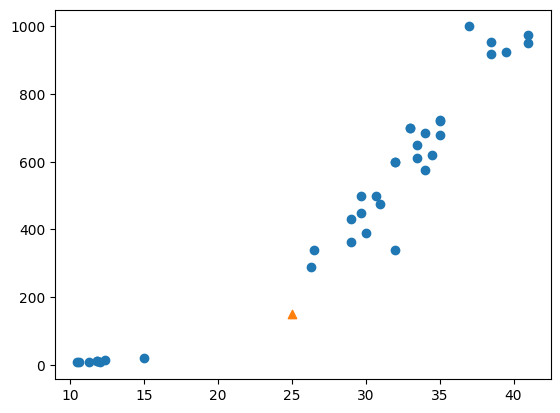

In [54]:
import matplotlib.pyplot as plt 

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^') # marker 로 ^ 표시로 바꾸기

In [56]:
kn.kneighbors([[25, 150]]) # 가까이 있는 인덱스 번호와 거리를 분석해서 알려줌

C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[130.48375378, 137.17988191, 140.00603558, 140.62090883,
         140.72046759]]),
 array([[30, 35,  6, 19, 25]]))

In [64]:
mean = train_input.mean()
std = train_input.std()
print(mean , std)

Length2     28.591667
Weight     493.172222
dtype: float64 Length2      9.700144
Weight     321.150445
dtype: float64


In [68]:
train_scaled = (train_input - mean) / std # 표준편차구하기

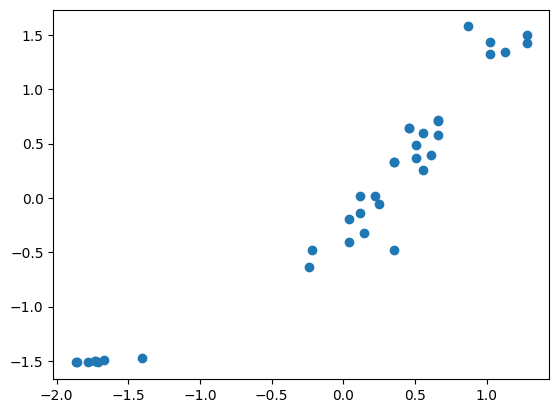

In [71]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight']) # x축과 y축의 간격이 똑같아짐 

In [73]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [78]:
test_scaled = (test_input - mean) / std # 표준점수로 만들어야 함 왜냐면 위에서 표준점수로 다 테스트했으니깐..

In [79]:
kn.score(test_scaled, test_target)

1.0

In [81]:
new = ([25, 150] - mean) / std
new

Length2   -0.370269
Weight    -1.068572
dtype: float64

In [82]:
kn.predict([new])

C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)